In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
car_data = pd.read_csv("cars-dataset.csv")

### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) –

In [3]:
car_data.describe() # "hp" is missing from the list 

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [4]:
car_data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
car_data.info() # there is no missing entry within any column but "hp" is in object it should be int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
car_data.isnull().any() # no null value found

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [7]:
car_data["hp"].unique() # there is a "?" which we need to treat

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
car_data['hp']=car_data['hp'].replace('?', np.nan) # replace all "?" with NAN

In [9]:
car_data['hp'] = car_data['hp'].fillna(car_data['hp'].median()) #replace nan values of hp from its median 

In [10]:
car_data['hp'] = car_data['hp'].astype(dtype = "int64") # converting to int

In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [12]:
car_data.describe() 

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


### Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)

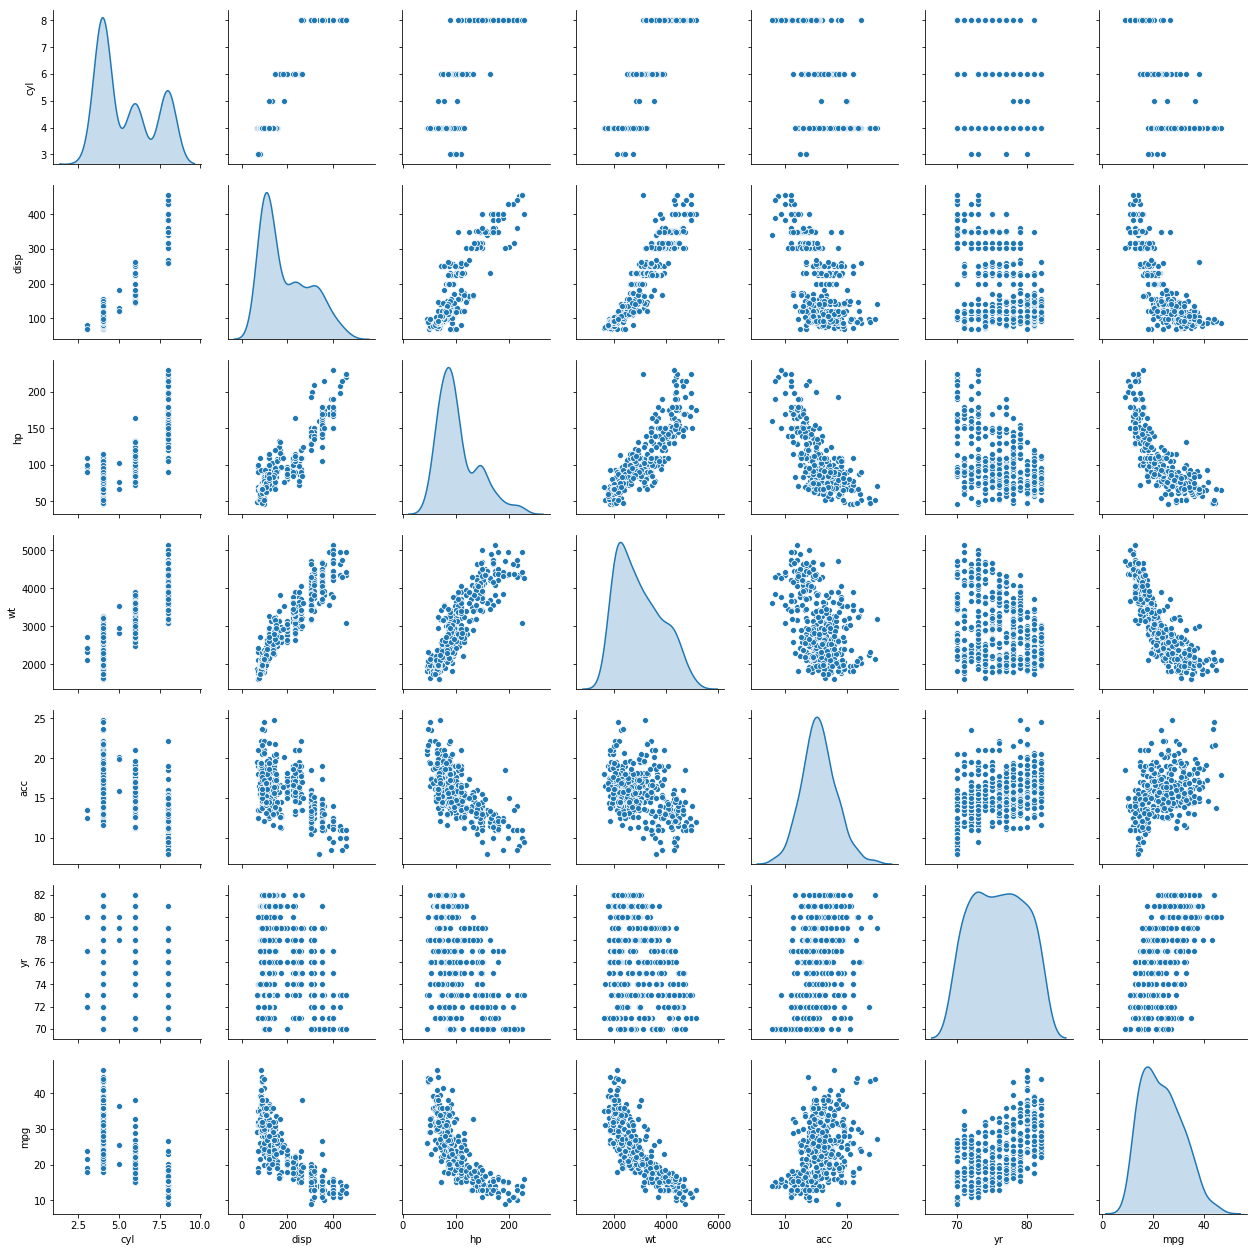

In [13]:
sns.pairplot(car_data, diag_kind='kde')

In [14]:
# ~ 3/2 visual 2d clusters existing in various attributes of data set
# Acc looks normally distributed
# mpg has non-linear relation with all other attributes

### Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [15]:
car_data_new = car_data.drop(columns=['car name'], axis=1)

In [16]:
from scipy.stats import zscore

In [17]:
data_df = car_data_new.loc[:, 'cyl':'mpg']
data_z = car_data_new.apply(zscore)


    # Remove  "yr" column
data_z.pop('yr')

array = data_z.values

In [18]:
from sklearn.cluster import KMeans

In [19]:
cluster_range = range( 1, 5)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 7)
  clusters.fit(car_data_new)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2.896352e+08
1,2,7.428935e+07
2,3,3.420798e+07
3,4,1.905155e+07


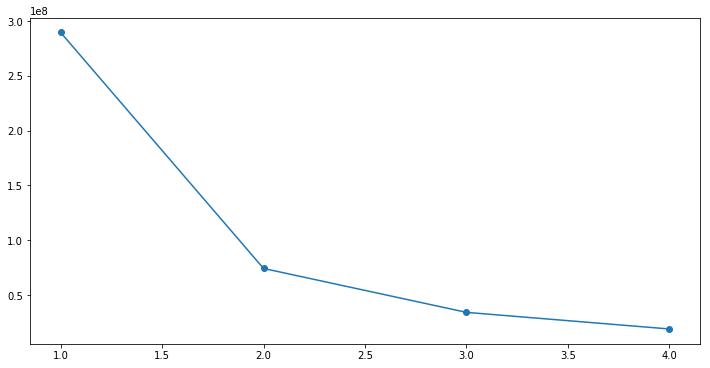

In [20]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [21]:
# there are 2 or 3 clusters

In [22]:
cluster = KMeans( n_clusters = 2, random_state = 2354 )
cluster.fit(data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [23]:
data_z_copy = data_z.copy(deep = True) 

### Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
car_data_new = car_data.loc[:, 'cyl':'mpg']
data_z = car_data_new.apply(zscore)


    # Remove  "yr" column
data_z.pop('yr')

array = data_z.values
X = array[:,0:4] # select all rows and first 4 columns which are the attributes
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6872455700361005
0.7814292800837038


In [28]:
print("regression_model:",(regression_model.coef_))

regression_model: [-0.03753309 -0.06060287 -0.21018054 -0.57025555]
